In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Conv2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers
from keras.initializers import he_uniform
import time
import random

In [2]:
# Define image size
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

13779
13779
[13779, 13779]


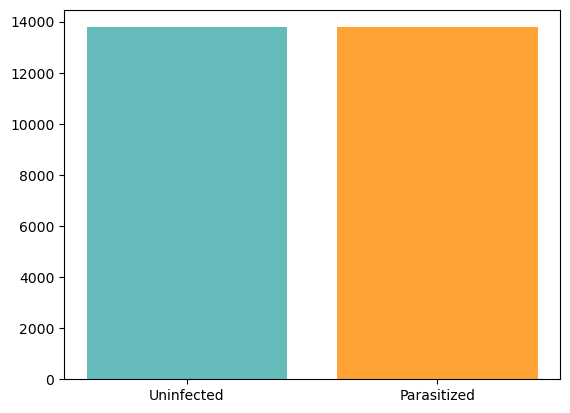

In [5]:
main_folder = 'D:\\malarie\\dataset\\cell_images\\cell_images\\'
subfolders = ['Uninfected','Parasitized']

counts = []
for subfolder in subfolders:
    folder_path = os.path.join(main_folder, subfolder)
    file_list = os.listdir(folder_path)
    photo_count = len([filename for filename in file_list if filename.endswith('.png')])
    counts.append(photo_count)
    print(photo_count)
print(counts)
plt.bar(['Uninfected','Parasitized'], counts, color=['#65BBBA', '#FFA434'])
plt.savefig("D:\\malarie\\new_graphics\\tabel_date_english.png")
plt.show()


In [3]:
main_folder = 'D:\\malarie\\dataset\\cell_images\\cell_images'
subfolder_1 = os.path.join(main_folder, 'Parasitized')
subfolder_2 = os.path.join(main_folder, 'Uninfected')

files_1 = os.listdir(subfolder_1)
files_2 = os.listdir(subfolder_2)

file_paths_1 = [os.path.join(subfolder_1, f) for f in files_1 if f.endswith('.png')]
file_paths_2 = [os.path.join(subfolder_2, f) for f in files_2 if f.endswith('.png')]

labels_1 = [1] * len(file_paths_1)
labels_2 = [0] * len(file_paths_2)

file_paths = file_paths_1 + file_paths_2
labels = labels_1 + labels_2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

# Split train set into train and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [4]:
len(X_train),len(X_val),len(X_test),len(y_train),len(y_val),len(y_test)

(22046, 2756, 2756, 22046, 2756, 2756)

In [5]:
y_train.count(0)

11064

In [6]:
y_train.count(0), y_train.count(1), len(X_train)

(11064, 10982, 22046)

In [7]:
import matplotlib.pyplot as plt
from tabulate import tabulate

data = [
    ["Set de data de antrenament", int(y_train.count(0)), int(y_train.count(1)), len(X_train)],
    ["Set de date de validare", int(y_val.count(0)), int(y_val.count(1)), len(X_val)],
    ["Set de date de test", int(y_test.count(0)), int(y_test.count(1)), len(X_test)]
]

table_headers = ["Set de date", "Neinfectat", "Parazitat", "Total"]
table = tabulate(data, headers=table_headers, tablefmt="pretty")

# Plot table without axis
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=data, colLabels=table_headers, cellLoc='center', loc='center')

# Save table as PNG
plt.savefig('D:\\malarie\\graphics\\tabel.png', bbox_inches='tight', dpi=300)
plt.close(fig)


In [8]:
X_train

['D:\\malarie\\dataset\\cell_images\\cell_images\\Parasitized\\C133P94ThinF_IMG_20151004_155912_cell_20.png',
 'D:\\malarie\\dataset\\cell_images\\cell_images\\Uninfected\\C57P18thinF_IMG_20150729_104027_cell_128.png',
 'D:\\malarie\\dataset\\cell_images\\cell_images\\Uninfected\\C107P68ThinF_IMG_20150924_222630_cell_12.png',
 'D:\\malarie\\dataset\\cell_images\\cell_images\\Uninfected\\C237ThinF_IMG_20151127_105345_cell_38.png',
 'D:\\malarie\\dataset\\cell_images\\cell_images\\Parasitized\\C136P97ThinF_IMG_20151005_142627_cell_8.png',
 'D:\\malarie\\dataset\\cell_images\\cell_images\\Parasitized\\C99P60ThinF_IMG_20150918_141857_cell_56.png',
 'D:\\malarie\\dataset\\cell_images\\cell_images\\Parasitized\\C68P29N_ThinF_IMG_20150819_134712_cell_34.png',
 'D:\\malarie\\dataset\\cell_images\\cell_images\\Parasitized\\C136P97ThinF_IMG_20151005_141552_cell_9.png',
 'D:\\malarie\\dataset\\cell_images\\cell_images\\Parasitized\\C59P20thinF_IMG_20150803_112858_cell_177.png',
 'D:\\malarie\\dat

In [9]:
import cv2
from concurrent import futures
import threading
import numpy as np

def get_img_shape_parallel(idx, img, total_imgs):
    if idx % 5000 == 0 or idx == (total_imgs - 1):
        print('{}: working on img num: {}'.format(threading.current_thread().name,
                                                  idx))
    return cv2.imread(img).shape
  
ex = futures.ThreadPoolExecutor(max_workers=None)
data_inp = [(idx, img, len(X_train)) for idx, img in enumerate(X_train)]
print('Starting Img shape computation:')
train_img_dims_map = ex.map(get_img_shape_parallel, 
                            [record[0] for record in data_inp],
                            [record[1] for record in data_inp],
                            [record[2] for record in data_inp])
train_img_dims = list(train_img_dims_map)
print('Min Dimensions:', np.min(train_img_dims, axis=0)) 
print('Avg Dimensions:', np.mean(train_img_dims, axis=0))
print('Median Dimensions:', np.median(train_img_dims, axis=0))
print('Max Dimensions:', np.max(train_img_dims, axis=0))

Starting Img shape computation:
ThreadPoolExecutor-0_0: working on img num: 0
ThreadPoolExecutor-0_12: working on img num: 5000
ThreadPoolExecutor-0_4: working on img num: 10000
ThreadPoolExecutor-0_12: working on img num: 15000
ThreadPoolExecutor-0_19: working on img num: 20000
ThreadPoolExecutor-0_21: working on img num: 22045
Min Dimensions: [40 46  3]
Avg Dimensions: [132.96217001 132.52290665   3.        ]
Median Dimensions: [130. 130.   3.]
Max Dimensions: [385 394   3]


In [10]:
import numpy as np

# Create a function for preprocessing images 
def process_image(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    # Read in an image file
    image = tf.io.read_file(image_path)
    # Turn the PNG image into numerical Tensor with 3 colour channels (Red, Green, Blue)
    image = tf.image.decode_png(image, channels=3)
    # Convert the colour channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Rescale the pixel values of the image to the range [0, 1]
    image = (image - tf.reduce_min(image)) / (tf.reduce_max(image) - tf.reduce_min(image))
    #Resize image
    image = tf.image.resize(image, [img_height, img_width], method=tf.image.ResizeMethod.BICUBIC)
    return image

In [11]:
# Horizontal flip
def flip_left_right(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    image = process_image(image_path)
    image=tf.image.flip_left_right(image)
    return image

In [12]:
# Vertical flip
def flip_up_down(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    image = process_image(image_path)
    image=tf.image.flip_up_down(image)
    return image

In [13]:
# Rotate 90 degrees
def rotate(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    image = process_image(image_path)
    image = tf.image.rot90(image)
    return image

In [14]:
# Darkening
def darken(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    darken_factor = random.uniform(0, 0.5)
    image = process_image(image_path)
    image = tf.image.adjust_brightness(image, -darken_factor)
    return image

In [15]:
# Lightening
def lighten(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    lighten_factor = random.uniform(0, 0.5)
    image = process_image(image_path)
    image = tf.image.adjust_brightness(image, lighten_factor)
    return image

In [16]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
    image = process_image(image_path)
    return image, label

In [17]:
# Create a simple function to return a tuple (image, label)
def get_flipped_lr_image_label(image_path, label):
    image = flip_left_right(image_path)
    return image, label

In [18]:
# Create a simple function to return a tuple (image, label)
def get_flipped_ud_image_label(image_path, label):
    image = flip_up_down(image_path)
    return image, label

In [19]:
# Create a simple function to return a tuple (image, label)
def get_rotated_image_label(image_path, label):
    image = rotate(image_path)
    return image, label

In [20]:
# Create a simple function to return a tuple (image, label)
def get_darken_image_label(image_path, label):
    image = darken(image_path)
    return image, label

In [21]:
# Create a simple function to return a tuple (image, label)
def get_lighten_image_label(image_path, label):
    image = lighten(image_path)
    return image, label

In [22]:
def create_data_batches(X, y, batch_size=BATCH_SIZE, test_data=False, augment_data=False):
    # If the data is a test/validation dataset, we don't need to shuffle it
    if test_data:
        print("Creating test/validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                               tf.constant(y))) 
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))
        # Add data augmentation if specified
        if augment_data:
            data_flipped_lr = data.map(get_flipped_lr_image_label)
            data_flipped_ud = data.map(get_flipped_ud_image_label)
            data_rotated = data.map(get_rotated_image_label)
            data_darken = data.map(get_darken_image_label)
            data_lighten = data.map(get_lighten_image_label)
            data = data.map(get_image_label)
            data = data.concatenate(data_flipped_lr)
            data = data.concatenate(data_flipped_ud)
            data = data.concatenate(data_rotated)
            data = data.concatenate(data_darken)
            data = data.concatenate(data_lighten)
        else:
            data = data.map(get_image_label)
        # Turn the training data into batches
        data_batch = data.batch(BATCH_SIZE)
        print("Dataset length:", tf.data.experimental.cardinality(data).numpy())
        return data_batch

In [23]:
train_data = create_data_batches(X_train, y_train, augment_data=False)
val_data = create_data_batches(X_val, y_val, test_data=True)
test_data=create_data_batches(X_test, y_test, test_data=True)

Creating training data batches...
Dataset length: 22046
Creating test/validation data batches...
Creating test/validation data batches...


In [24]:
# View string representation of datasets
print('========================================')
print('Train Input Data Pipeline:\n\n', train_data)
print('========================================')
print('Validation Input Data Pipeline:\n\n', val_data)
print('========================================')
print('Test Input Data Pipeline:\n\n', test_data)
print('========================================')

Train Input Data Pipeline:

 <BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>
Validation Input Data Pipeline:

 <BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>
Test Input Data Pipeline:

 <BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>


In [25]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Create a callback to reduce the learning rate when the validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [26]:
EPOCHS=10
callbacks = [reduce_lr]

In [29]:
from sklearn.model_selection import ParameterGrid

# Define the parameter grid
param_grid = {
    'batch_size': [16,32,64],
    'filters': [16, 32],
    'learning_rate': [0.001, 0.0001],
    'dropout_rate': [0.3, 0.4, 0.5]
}

# Create a function for building the model
def create_CNN(filters, learning_rate, dropout_rate):
    model = Sequential()
    model.add(Conv2D(filters, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3), kernel_initializer='he_normal'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(filters * 2, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(filters * 4, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(filters * 8, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))
    
    model.add(Flatten())

    model.add(Dense(filters * 16, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Perform the grid search
best_accuracy = 0.0
best_params = {}

for params in ParameterGrid(param_grid):
    print("Testing parameters:", params)
    train_data = create_data_batches(X_train, y_train, batch_size=params['batch_size'], augment_data=False)
    val_data = create_data_batches(X_val, y_val, batch_size=params['batch_size'], test_data=True)
    test_data=create_data_batches(X_test, y_test, batch_size=params['batch_size'], test_data=True)
    # Create the model with the current parameter values
    model = create_CNN(params['filters'], params['learning_rate'], params['dropout_rate'])
    
    # Train and evaluate the model using train/validation split
    # ...
    model.fit(train_data,
batch_size=params['batch_size'],
epochs=EPOCHS,
validation_data=val_data,
callbacks=callbacks,
verbose=1)
    loss,accuracy=model.evaluate(test_data)

    # Keep track of the best parameters based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)


Testing parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'filters': 16, 'learning_rate': 0.001}
Creating training data batches...
Dataset length: 22046
Creating test/validation data batches...
Creating test/validation data batches...
Epoch 1/10
689/689 [==============================] - 18s 17ms/step - loss: 0.3603 - accuracy: 0.8122 - val_loss: 0.1331 - val_accuracy: 0.9604
Epoch 2/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1359 - accuracy: 0.9549 - val_loss: 0.1191 - val_accuracy: 0.9637
Epoch 3/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1218 - accuracy: 0.9597 - val_loss: 0.1150 - val_accuracy: 0.9644
Epoch 4/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1085 - accuracy: 0.9641 - val_loss: 0.1158 - val_accuracy: 0.9641
Epoch 5/10
689/689 [==============================] - 11s 16ms/step - loss: 0.0984 - accuracy: 0.9656 - val_loss: 0.1217 - val_accuracy: 0.9634
Epoch 6/10
689/689 [=======================

689/689 [==============================] - 11s 16ms/step - loss: 0.2909 - accuracy: 0.8833 - val_loss: 0.1720 - val_accuracy: 0.9416
Epoch 3/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1677 - accuracy: 0.9440 - val_loss: 0.1363 - val_accuracy: 0.9543
Epoch 4/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1469 - accuracy: 0.9509 - val_loss: 0.1311 - val_accuracy: 0.9608
Epoch 5/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1337 - accuracy: 0.9561 - val_loss: 0.1242 - val_accuracy: 0.9594
Epoch 6/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1232 - accuracy: 0.9580 - val_loss: 0.1212 - val_accuracy: 0.9579
Epoch 7/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1173 - accuracy: 0.9604 - val_loss: 0.1213 - val_accuracy: 0.9608
Epoch 8/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1113 - accuracy: 0.9614 - val_loss: 0.1172 - val_accuracy: 0.9597
Epo

689/689 [==============================] - 19s 27ms/step - loss: 0.1131 - accuracy: 0.9620 - val_loss: 0.1218 - val_accuracy: 0.9608
Epoch 5/10
689/689 [==============================] - 19s 27ms/step - loss: 0.1046 - accuracy: 0.9627 - val_loss: 0.1141 - val_accuracy: 0.9626
Epoch 6/10
689/689 [==============================] - 19s 27ms/step - loss: 0.0947 - accuracy: 0.9667 - val_loss: 0.1209 - val_accuracy: 0.9619
Epoch 7/10
689/689 [==============================] - 19s 27ms/step - loss: 0.0828 - accuracy: 0.9706 - val_loss: 0.1447 - val_accuracy: 0.9626
Epoch 8/10
689/689 [==============================] - 19s 27ms/step - loss: 0.0703 - accuracy: 0.9746 - val_loss: 0.1473 - val_accuracy: 0.9623
Epoch 9/10
689/689 [==============================] - 19s 27ms/step - loss: 0.0368 - accuracy: 0.9859 - val_loss: 0.1617 - val_accuracy: 0.9619
Epoch 10/10
87/87 [==============================] - 1s 15ms/step - loss: 0.2183 - accuracy: 0.9525
Testing parameters: {'batch_size': 32, 'dropout

Epoch 1/10
689/689 [==============================] - 20s 27ms/step - loss: 0.4417 - accuracy: 0.7724 - val_loss: 0.1628 - val_accuracy: 0.9521
Epoch 2/10
689/689 [==============================] - 19s 28ms/step - loss: 0.1577 - accuracy: 0.9499 - val_loss: 0.1261 - val_accuracy: 0.9586
Epoch 3/10
689/689 [==============================] - 19s 28ms/step - loss: 0.1312 - accuracy: 0.9570 - val_loss: 0.1187 - val_accuracy: 0.9612
Epoch 4/10
689/689 [==============================] - 19s 28ms/step - loss: 0.1190 - accuracy: 0.9595 - val_loss: 0.1111 - val_accuracy: 0.9612
Epoch 5/10
689/689 [==============================] - 19s 27ms/step - loss: 0.1101 - accuracy: 0.9624 - val_loss: 0.1088 - val_accuracy: 0.9619
Epoch 6/10
689/689 [==============================] - 20s 28ms/step - loss: 0.1013 - accuracy: 0.9642 - val_loss: 0.1137 - val_accuracy: 0.9612
Epoch 7/10
689/689 [==============================] - 19s 27ms/step - loss: 0.0923 - accuracy: 0.9677 - val_loss: 0.1158 - val_accuracy:

689/689 [==============================] - 11s 16ms/step - loss: 0.1249 - accuracy: 0.9591 - val_loss: 0.1139 - val_accuracy: 0.9623
Epoch 4/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1177 - accuracy: 0.9603 - val_loss: 0.1098 - val_accuracy: 0.9637
Epoch 5/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1040 - accuracy: 0.9630 - val_loss: 0.1090 - val_accuracy: 0.9626
Epoch 6/10
689/689 [==============================] - 11s 16ms/step - loss: 0.0983 - accuracy: 0.9656 - val_loss: 0.1204 - val_accuracy: 0.9623
Epoch 7/10
689/689 [==============================] - 11s 16ms/step - loss: 0.0899 - accuracy: 0.9664 - val_loss: 0.1286 - val_accuracy: 0.9641
Epoch 8/10
689/689 [==============================] - 11s 16ms/step - loss: 0.0770 - accuracy: 0.9721 - val_loss: 0.1292 - val_accuracy: 0.9608
Epoch 9/10
689/689 [==============================] - 11s 16ms/step - loss: 0.0464 - accuracy: 0.9831 - val_loss: 0.1460 - val_accuracy: 0.9604
Epo

In [30]:
from sklearn.model_selection import ParameterGrid

# Define the parameter grid
param_grid = {
    'batch_size': [16,32,64],
    'filters': [16, 32],
    'learning_rate': [0.001, 0.0001],
    'dropout_rate': [0.3, 0.4, 0.5]
}

# Create a function for building the model
def create_CNN(filters, learning_rate, dropout_rate):
    model = Sequential()
    model.add(Conv2D(filters, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3), kernel_initializer='he_normal'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(filters * 2, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(filters * 4, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(filters * 8, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))
    
    model.add(Flatten())

    model.add(Dense(filters * 8, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

best_accuracy = 0.0
best_params = {}

for params in ParameterGrid(param_grid):
    print("Testing parameters:", params)
    train_data = create_data_batches(X_train, y_train, batch_size=params['batch_size'], augment_data=False)
    val_data = create_data_batches(X_val, y_val, batch_size=params['batch_size'], test_data=True)
    test_data=create_data_batches(X_test, y_test, batch_size=params['batch_size'], test_data=True)
    # Create the model with the current parameter values
    model = create_CNN(params['filters'], params['learning_rate'], params['dropout_rate'])
    
    # Train and evaluate the model using train/validation split
    # ...
    model.fit(train_data,
batch_size=params['batch_size'],
epochs=EPOCHS,
validation_data=val_data,
callbacks=callbacks,
verbose=1)
    loss,accuracy=model.evaluate(test_data)

    # Keep track of the best parameters based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)


Testing parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'filters': 16, 'learning_rate': 0.001}
Creating training data batches...
Dataset length: 22046
Creating test/validation data batches...
Creating test/validation data batches...
Epoch 1/10
689/689 [==============================] - 12s 17ms/step - loss: 0.4620 - accuracy: 0.7402 - val_loss: 0.1543 - val_accuracy: 0.9532
Epoch 2/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1478 - accuracy: 0.9536 - val_loss: 0.1272 - val_accuracy: 0.9590
Epoch 3/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1282 - accuracy: 0.9587 - val_loss: 0.1120 - val_accuracy: 0.9630
Epoch 4/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1159 - accuracy: 0.9612 - val_loss: 0.1170 - val_accuracy: 0.9634
Epoch 5/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1051 - accuracy: 0.9632 - val_loss: 0.1185 - val_accuracy: 0.9608
Epoch 6/10
689/689 [=======================

689/689 [==============================] - 12s 17ms/step - loss: 0.5141 - accuracy: 0.7526 - val_loss: 0.4209 - val_accuracy: 0.8306
Epoch 3/10
689/689 [==============================] - 12s 17ms/step - loss: 0.3483 - accuracy: 0.8579 - val_loss: 0.2109 - val_accuracy: 0.9289
Epoch 4/10
689/689 [==============================] - 12s 17ms/step - loss: 0.2025 - accuracy: 0.9291 - val_loss: 0.1571 - val_accuracy: 0.9463
Epoch 5/10
689/689 [==============================] - 12s 17ms/step - loss: 0.1654 - accuracy: 0.9413 - val_loss: 0.1399 - val_accuracy: 0.9510
Epoch 6/10
689/689 [==============================] - 12s 17ms/step - loss: 0.1488 - accuracy: 0.9482 - val_loss: 0.1477 - val_accuracy: 0.9456
Epoch 7/10
689/689 [==============================] - 12s 17ms/step - loss: 0.1378 - accuracy: 0.9526 - val_loss: 0.1364 - val_accuracy: 0.9492
Epoch 8/10
689/689 [==============================] - 12s 17ms/step - loss: 0.1280 - accuracy: 0.9565 - val_loss: 0.1303 - val_accuracy: 0.9517
Epo

Epoch 10/10
87/87 [==============================] - 2s 21ms/step - loss: 0.1382 - accuracy: 0.9554
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'filters': 32, 'learning_rate': 0.001}
Creating training data batches...
Dataset length: 22046
Creating test/validation data batches...
Creating test/validation data batches...
Epoch 1/10
689/689 [==============================] - 19s 26ms/step - loss: 0.2938 - accuracy: 0.8591 - val_loss: 0.1294 - val_accuracy: 0.9615
Epoch 2/10
689/689 [==============================] - 18s 27ms/step - loss: 0.1362 - accuracy: 0.9563 - val_loss: 0.1177 - val_accuracy: 0.9641
Epoch 3/10
689/689 [==============================] - 18s 26ms/step - loss: 0.1187 - accuracy: 0.9609 - val_loss: 0.1339 - val_accuracy: 0.9539
Epoch 4/10
689/689 [==============================] - 18s 26ms/step - loss: 0.1091 - accuracy: 0.9619 - val_loss: 0.1130 - val_accuracy: 0.9641
Epoch 5/10
689/689 [==============================] - 18s 27ms/step - loss: 0.0973 - ac

Creating test/validation data batches...
Epoch 1/10
689/689 [==============================] - 19s 27ms/step - loss: 0.4349 - accuracy: 0.7821 - val_loss: 0.1518 - val_accuracy: 0.9496
Epoch 2/10
689/689 [==============================] - 18s 26ms/step - loss: 0.1604 - accuracy: 0.9484 - val_loss: 0.1386 - val_accuracy: 0.9583
Epoch 3/10
689/689 [==============================] - 18s 26ms/step - loss: 0.1379 - accuracy: 0.9555 - val_loss: 0.1368 - val_accuracy: 0.9565
Epoch 4/10
689/689 [==============================] - 18s 27ms/step - loss: 0.1266 - accuracy: 0.9585 - val_loss: 0.1176 - val_accuracy: 0.9626
Epoch 5/10
689/689 [==============================] - 18s 26ms/step - loss: 0.1157 - accuracy: 0.9614 - val_loss: 0.1146 - val_accuracy: 0.9608
Epoch 6/10
689/689 [==============================] - 18s 26ms/step - loss: 0.1067 - accuracy: 0.9620 - val_loss: 0.1109 - val_accuracy: 0.9630
Epoch 7/10
689/689 [==============================] - 18s 26ms/step - loss: 0.0998 - accuracy: 

689/689 [==============================] - 14s 20ms/step - loss: 0.1297 - accuracy: 0.9582 - val_loss: 0.1239 - val_accuracy: 0.9583
Epoch 4/10
689/689 [==============================] - 13s 19ms/step - loss: 0.1206 - accuracy: 0.9601 - val_loss: 0.1082 - val_accuracy: 0.9623
Epoch 5/10
689/689 [==============================] - 12s 18ms/step - loss: 0.1086 - accuracy: 0.9620 - val_loss: 0.1337 - val_accuracy: 0.9594
Epoch 6/10
689/689 [==============================] - 12s 18ms/step - loss: 0.0992 - accuracy: 0.9648 - val_loss: 0.1124 - val_accuracy: 0.9612
Epoch 7/10
689/689 [==============================] - 12s 17ms/step - loss: 0.0872 - accuracy: 0.9686 - val_loss: 0.1159 - val_accuracy: 0.9666
Epoch 8/10
689/689 [==============================] - 11s 16ms/step - loss: 0.0625 - accuracy: 0.9777 - val_loss: 0.1209 - val_accuracy: 0.9648
Epoch 9/10
689/689 [==============================] - 11s 16ms/step - loss: 0.0472 - accuracy: 0.9830 - val_loss: 0.1266 - val_accuracy: 0.9637
Epo

In [25]:
from sklearn.model_selection import ParameterGrid

# Define the parameter grid
param_grid = {
    'batch_size': [16,32,64],
    'filters': [16],
    'learning_rate': [0.001, 0.0001],
    'dropout_rate': [0.3, 0.4, 0.5]
}

# Create a function for building the model
def create_CNN(filters, learning_rate, dropout_rate):
    model = Sequential()
    model.add(Conv2D(filters, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3), kernel_initializer='he_normal'))
    model.add(Conv2D(filters, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(filters * 2, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters * 2, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(filters * 4, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters * 4, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(filters * 8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters * 8, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))
    
    model.add(Flatten())

    model.add(Dense(filters * 16, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Perform the grid search
best_accuracy = 0.0
best_params = {}

for params in ParameterGrid(param_grid):
    print("Testing parameters:", params)
    train_data = create_data_batches(X_train, y_train, batch_size=params['batch_size'], augment_data=False)
    val_data = create_data_batches(X_val, y_val, batch_size=params['batch_size'], test_data=True)
    test_data=create_data_batches(X_test, y_test, batch_size=params['batch_size'], test_data=True)
    # Create the model with the current parameter values
    model = create_CNN(params['filters'], params['learning_rate'], params['dropout_rate'])
    
    # Train and evaluate the model using train/validation split
    # ...
    model.fit(train_data,
batch_size=params['batch_size'],
epochs=EPOCHS,
validation_data=val_data,
callbacks=callbacks,
verbose=1)
    loss,accuracy=model.evaluate(test_data)

    # Keep track of the best parameters based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)


Testing parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'filters': 16, 'learning_rate': 0.001}
Creating training data batches...
Dataset length: 22046
Creating test/validation data batches...
Creating test/validation data batches...
Epoch 1/10
689/689 [==============================] - 32s 36ms/step - loss: 0.3453 - accuracy: 0.8214 - val_loss: 0.1381 - val_accuracy: 0.9539
Epoch 2/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1414 - accuracy: 0.9558 - val_loss: 0.1289 - val_accuracy: 0.9594
Epoch 3/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1313 - accuracy: 0.9580 - val_loss: 0.1206 - val_accuracy: 0.9612
Epoch 4/10
689/689 [==============================] - 23s 33ms/step - loss: 0.1292 - accuracy: 0.9577 - val_loss: 0.1355 - val_accuracy: 0.9634
Epoch 5/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1207 - accuracy: 0.9595 - val_loss: 0.2071 - val_accuracy: 0.9438
Epoch 6/10
689/689 [=======================

689/689 [==============================] - 22s 32ms/step - loss: 0.1482 - accuracy: 0.9520 - val_loss: 0.1272 - val_accuracy: 0.9601
Epoch 3/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1347 - accuracy: 0.9556 - val_loss: 0.1183 - val_accuracy: 0.9612
Epoch 4/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1244 - accuracy: 0.9589 - val_loss: 0.1175 - val_accuracy: 0.9615
Epoch 5/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1185 - accuracy: 0.9608 - val_loss: 0.1130 - val_accuracy: 0.9634
Epoch 6/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1140 - accuracy: 0.9613 - val_loss: 0.1066 - val_accuracy: 0.9655
Epoch 7/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1061 - accuracy: 0.9634 - val_loss: 0.1072 - val_accuracy: 0.9677
Epoch 8/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1038 - accuracy: 0.9641 - val_loss: 0.1270 - val_accuracy: 0.9550
Epo

Epoch 10/10
87/87 [==============================] - 2s 17ms/step - loss: 0.1281 - accuracy: 0.9644
Testing parameters: {'batch_size': 64, 'dropout_rate': 0.4, 'filters': 16, 'learning_rate': 0.001}
Creating training data batches...
Dataset length: 22046
Creating test/validation data batches...
Creating test/validation data batches...
Epoch 1/10
689/689 [==============================] - 23s 32ms/step - loss: 0.6906 - accuracy: 0.5520 - val_loss: 0.6720 - val_accuracy: 0.5911
Epoch 2/10
689/689 [==============================] - 22s 32ms/step - loss: 0.6596 - accuracy: 0.6065 - val_loss: 0.6394 - val_accuracy: 0.6488
Epoch 3/10
689/689 [==============================] - 23s 33ms/step - loss: 0.4419 - accuracy: 0.7777 - val_loss: 0.1390 - val_accuracy: 0.9557
Epoch 4/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1473 - accuracy: 0.9539 - val_loss: 0.1267 - val_accuracy: 0.9608
Epoch 5/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1334 - ac

In [27]:
my_CNN=create_CNN(best_params['filters'], best_params['learning_rate'], best_params['dropout_rate'])
my_CNN.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 128, 128, 16)      2320      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 32, 32, 64)      

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_160 (Conv2D)          (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 128, 128, 16)      2320      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_162 (Conv2D)          (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 32, 32, 64)      

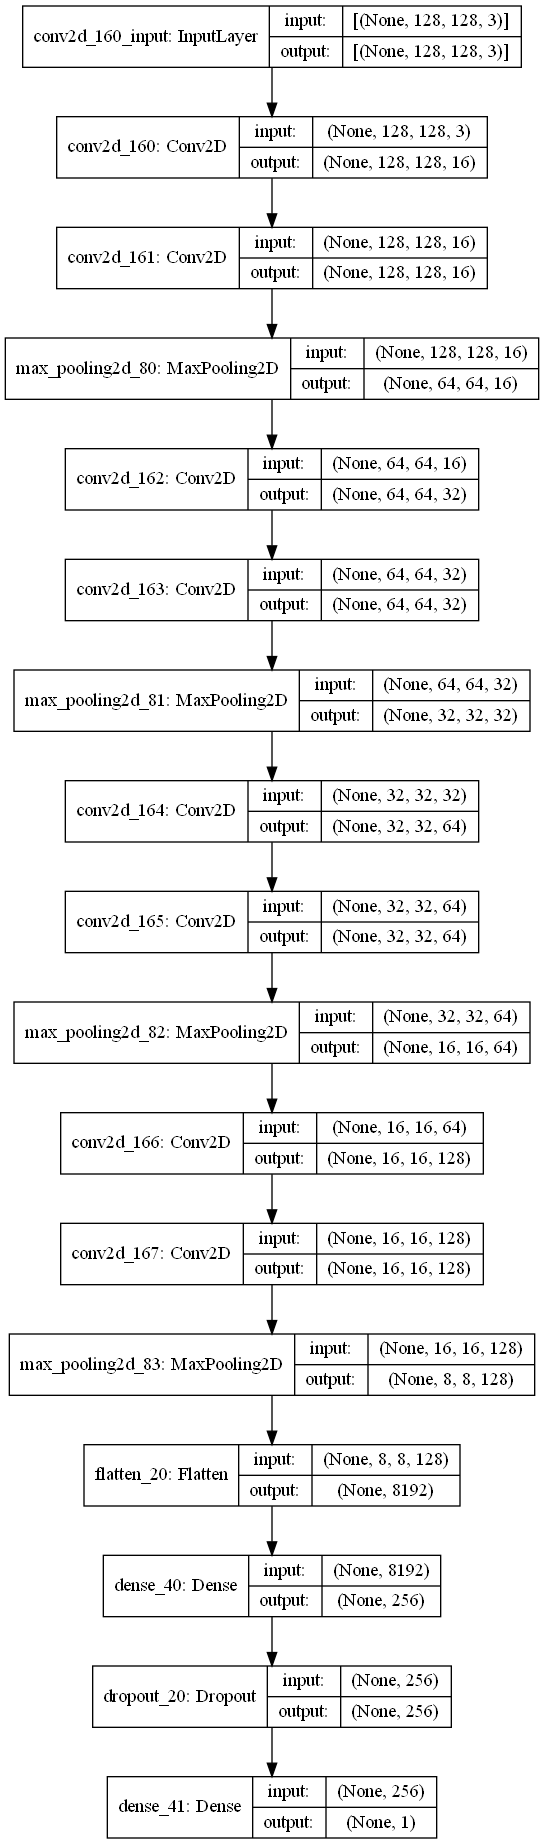

In [29]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

my_CNN = create_CNN(best_params['filters'], best_params['learning_rate'], best_params['dropout_rate'])
my_CNN.summary()

# Plot the model architecture
plot_model(my_CNN, to_file='D:\\malarie\\graphics\\cnn_architecture.png', show_shapes=True)


In [25]:
def create_CNN_final():
    model=Sequential()
    model.add(Conv2D(16, (3,3), activation = 'relu', padding='same', input_shape = (128, 128, 3), kernel_initializer='he_normal'))
    model.add(Conv2D(16, (3,3), activation = 'relu', padding='same'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
    model.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
    model.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
    model.add(MaxPooling2D(2,2))
    
    model.add(Conv2D(128, (3,3), activation = 'relu', padding='same'))
    model.add(Conv2D(128, (3,3), activation = 'relu', padding='same'))
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
        
    model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.3))
    
 
    model.add(Dense(1, activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.0001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [26]:
CNN=create_CNN_final()
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1

In [27]:
train_data = create_data_batches(X_train, y_train, batch_size=16, augment_data=False)
val_data = create_data_batches(X_val, y_val, batch_size=16, test_data=True)
test_data=create_data_batches(X_test, y_test, batch_size=16, test_data=True)

Creating training data batches...
Dataset length: 22046
Creating test/validation data batches...
Creating test/validation data batches...


Epoch 1/10
689/689 [==============================] - 30s 36ms/step - loss: 0.4023 - accuracy: 0.7887 - val_loss: 0.1420 - val_accuracy: 0.9474
Epoch 2/10
689/689 [==============================] - 23s 33ms/step - loss: 0.1431 - accuracy: 0.9545 - val_loss: 0.1222 - val_accuracy: 0.9615
Epoch 3/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1297 - accuracy: 0.9565 - val_loss: 0.1220 - val_accuracy: 0.9615
Epoch 4/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1195 - accuracy: 0.9597 - val_loss: 0.1158 - val_accuracy: 0.9604
Epoch 5/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1151 - accuracy: 0.9610 - val_loss: 0.1150 - val_accuracy: 0.9630
Epoch 6/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1085 - accuracy: 0.9625 - val_loss: 0.1090 - val_accuracy: 0.9626
Epoch 7/10
689/689 [==============================] - 22s 32ms/step - loss: 0.1043 - accuracy: 0.9639 - val_loss: 0.1064 - val_accuracy:

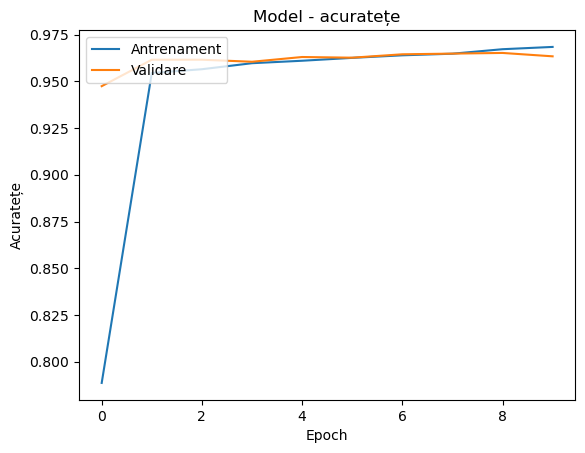

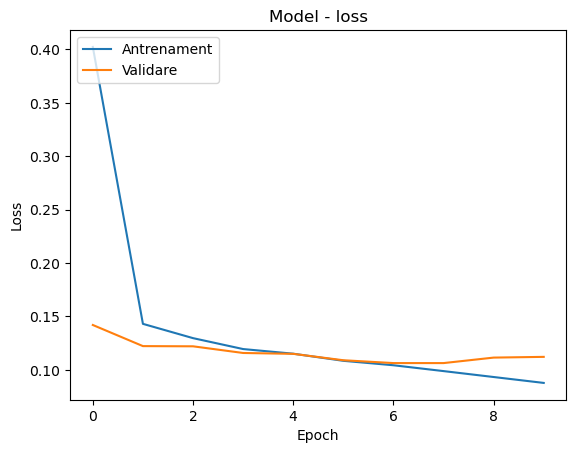

249.90227365493774
87/87 [==============================] - 2s 27ms/step - loss: 0.1195 - accuracy: 0.9641
[0.11951018124818802, 0.9640783667564392]


In [28]:
import time
start_time = time.time()
callbacks = [reduce_lr]
history = CNN.fit(train_data,
batch_size=16,
epochs=10,
validation_data=val_data,
callbacks=callbacks,
verbose=1)
end_time = time.time()
elapsed_time = end_time - start_time
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model - acuratețe')
plt.xlabel('Epoch')
plt.ylabel('Acuratețe')
plt.legend(['Antrenament', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_acc_cnn_final_without_augg_10.png")
plt.show()
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model - loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Antrenament', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_loss_cnn_final_without_aug_10.png")
plt.show()
print(elapsed_time)
CNN.save('D:\\malarie\\new_models\\of_cnn_final_model_10epochs_without_aug.h5')
print(CNN.evaluate(test_data))

In [27]:
# Load the saved model
CNN = tf.keras.models.load_model('D:\\malarie\\new_models\\of_cnn_final_model_10epochs_without_aug.h5')

In [29]:
from sklearn.metrics import classification_report
y_pred = CNN.predict(test_data)
print(y_pred)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
# print classification report
target_names = ['Neinfectat', 'Parazitat']  
print(classification_report(y_test, y_pred_classes, target_names=target_names))

[[9.9999833e-01]
 [5.2976521e-04]
 [9.9999893e-01]
 ...
 [1.0511793e-01]
 [9.9997616e-01]
 [2.9019569e-04]]
              precision    recall  f1-score   support

  Neinfectat       0.95      0.98      0.96      1351
   Parazitat       0.98      0.95      0.96      1405

    accuracy                           0.96      2756
   macro avg       0.96      0.96      0.96      2756
weighted avg       0.96      0.96      0.96      2756



In [34]:
train_data = create_data_batches(X_train, y_train, batch_size=16, augment_data=True)
val_data = create_data_batches(X_val, y_val, batch_size=16, test_data=True)
test_data=create_data_batches(X_test, y_test, batch_size=16, test_data=True)

Creating training data batches...
Dataset length: 132276
Creating test/validation data batches...
Creating test/validation data batches...


Epoch 1/10
4134/4134 [==============================] - 218s 51ms/step - loss: 0.1777 - accuracy: 0.9308 - val_loss: 0.1168 - val_accuracy: 0.9612
Epoch 2/10
4134/4134 [==============================] - 212s 51ms/step - loss: 0.1084 - accuracy: 0.9625 - val_loss: 0.0992 - val_accuracy: 0.9688
Epoch 3/10
4134/4134 [==============================] - 202s 49ms/step - loss: 0.0950 - accuracy: 0.9668 - val_loss: 0.1008 - val_accuracy: 0.9677
Epoch 4/10
4134/4134 [==============================] - 199s 48ms/step - loss: 0.0838 - accuracy: 0.9702 - val_loss: 0.0950 - val_accuracy: 0.9721
Epoch 5/10
4134/4134 [==============================] - 201s 49ms/step - loss: 0.0730 - accuracy: 0.9739 - val_loss: 0.1023 - val_accuracy: 0.9666
Epoch 6/10
4134/4134 [==============================] - 201s 49ms/step - loss: 0.0627 - accuracy: 0.9779 - val_loss: 0.1129 - val_accuracy: 0.9695
Epoch 7/10
4134/4134 [==============================] - 200s 48ms/step - loss: 0.0530 - accuracy: 0.9811 - val_loss: 0

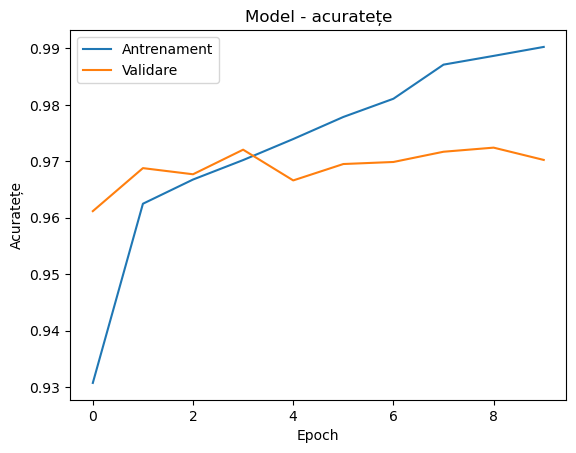

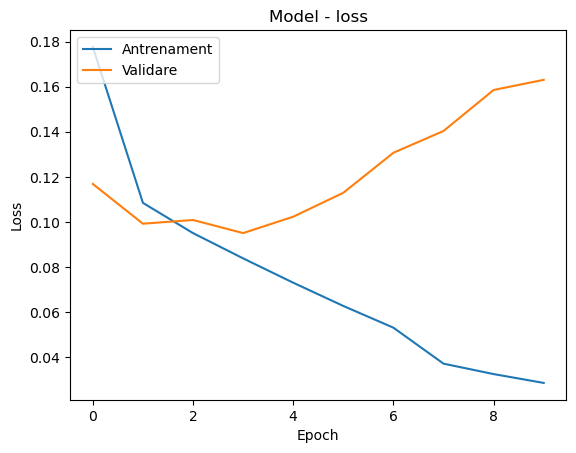

2081.6875398159027
87/87 [==============================] - 2s 24ms/step - loss: 0.2078 - accuracy: 0.9652
[0.20777541399002075, 0.9651669263839722]


In [29]:
import time
start_time = time.time()
callbacks = [reduce_lr]
history = CNN.fit(train_data,
batch_size=16,
epochs=10,
validation_data=val_data,
callbacks=callbacks,
verbose=1)
end_time = time.time()
elapsed_time = end_time - start_time
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model - acuratețe')
plt.xlabel('Epoch')
plt.ylabel('Acuratețe')
plt.legend(['Antrenament', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_acc_cnn_final_with_augg_10.png")
plt.show()
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model - loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Antrenament', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_loss_cnn_final_with_aug_10.png")
plt.show()
print(elapsed_time)
CNN.save('D:\\malarie\\new_models\\of_cnn_final_model_10epochs_with_aug.h5')
print(CNN.evaluate(test_data))

Epoch 1/10
4134/4134 [==============================] - 222s 52ms/step - loss: 0.1785 - accuracy: 0.9301 - val_loss: 0.1153 - val_accuracy: 0.9634
Epoch 2/10
4134/4134 [==============================] - 207s 50ms/step - loss: 0.1072 - accuracy: 0.9633 - val_loss: 0.1051 - val_accuracy: 0.9670
Epoch 3/10
4134/4134 [==============================] - 210s 51ms/step - loss: 0.0925 - accuracy: 0.9673 - val_loss: 0.0975 - val_accuracy: 0.9728
Epoch 4/10
4134/4134 [==============================] - 209s 51ms/step - loss: 0.0814 - accuracy: 0.9716 - val_loss: 0.0961 - val_accuracy: 0.9724
Epoch 5/10
4134/4134 [==============================] - 212s 51ms/step - loss: 0.0705 - accuracy: 0.9748 - val_loss: 0.1144 - val_accuracy: 0.9710
Epoch 6/10
4134/4134 [==============================] - 211s 51ms/step - loss: 0.0600 - accuracy: 0.9787 - val_loss: 0.1369 - val_accuracy: 0.9713
Epoch 7/10
4134/4134 [==============================] - 212s 51ms/step - loss: 0.0510 - accuracy: 0.9820 - val_loss: 0

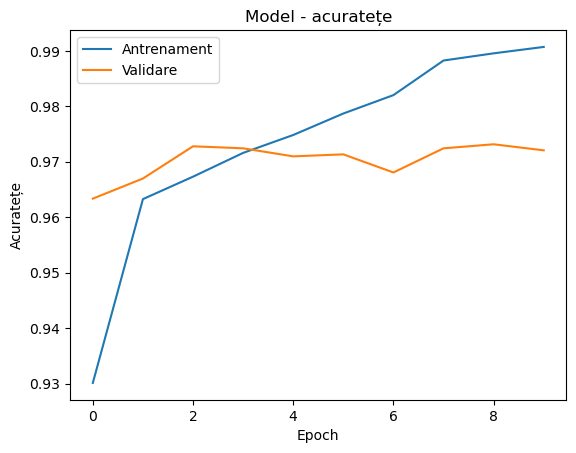

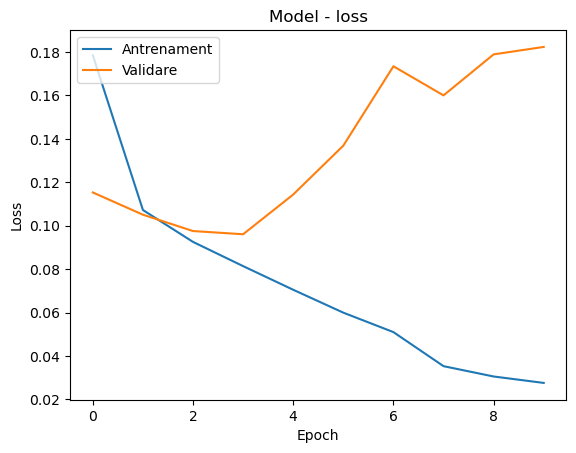

2116.6895010471344
87/87 [==============================] - 1s 15ms/step - loss: 0.2003 - accuracy: 0.9663
[0.2002575844526291, 0.9662554264068604]


In [28]:
import time
start_time = time.time()
callbacks = [reduce_lr]
history = CNN.fit(train_data,
batch_size=32,
epochs=10,
validation_data=val_data,
callbacks=callbacks,
verbose=1)
end_time = time.time()
elapsed_time = end_time - start_time
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model - acuratețe')
plt.xlabel('Epoch')
plt.ylabel('Acuratețe')
plt.legend(['Antrenament', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_acc_cnn_final_with_augg_10.png")
plt.show()
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model - loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Antrenament', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_loss_cnn_final_with_aug_10.png")
plt.show()
print(elapsed_time)
CNN.save('D:\\malarie\\new_models\\of_cnn_final_model_10epochs_with_aug.h5')
print(CNN.evaluate(test_data))

In [28]:
def create_CNN_final():
    model=Sequential()
    model.add(Conv2D(16, (3,3), activation = 'relu', padding='same', input_shape = (128, 128, 3), kernel_initializer='he_normal'))
    model.add(Conv2D(16, (3,3), activation = 'relu', padding='same'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
    model.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
    model.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
    model.add(MaxPooling2D(2,2))
    
    model.add(Conv2D(128, (3,3), activation = 'relu', padding='same'))
    model.add(Conv2D(128, (3,3), activation = 'relu', padding='same'))
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
        
    model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.3))
    
 
    model.add(Dense(1, activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.00005)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [29]:
CNN=create_CNN_final()
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 64)       

Epoch 1/10
4134/4134 [==============================] - 206s 48ms/step - loss: 0.2188 - accuracy: 0.9074 - val_loss: 0.1302 - val_accuracy: 0.9575
Epoch 2/10
4134/4134 [==============================] - 208s 50ms/step - loss: 0.1172 - accuracy: 0.9603 - val_loss: 0.1044 - val_accuracy: 0.9637
Epoch 3/10
4134/4134 [==============================] - 201s 49ms/step - loss: 0.1028 - accuracy: 0.9640 - val_loss: 0.1112 - val_accuracy: 0.9644
Epoch 4/10
4134/4134 [==============================] - 202s 49ms/step - loss: 0.0932 - accuracy: 0.9666 - val_loss: 0.1259 - val_accuracy: 0.9583
Epoch 5/10
4134/4134 [==============================] - 201s 49ms/step - loss: 0.0854 - accuracy: 0.9689 - val_loss: 0.1285 - val_accuracy: 0.9608
Epoch 6/10
4134/4134 [==============================] - 196s 47ms/step - loss: 0.0720 - accuracy: 0.9738 - val_loss: 0.1098 - val_accuracy: 0.9670
Epoch 7/10
4134/4134 [==============================] - 202s 49ms/step - loss: 0.0679 - accuracy: 0.9752 - val_loss: 0

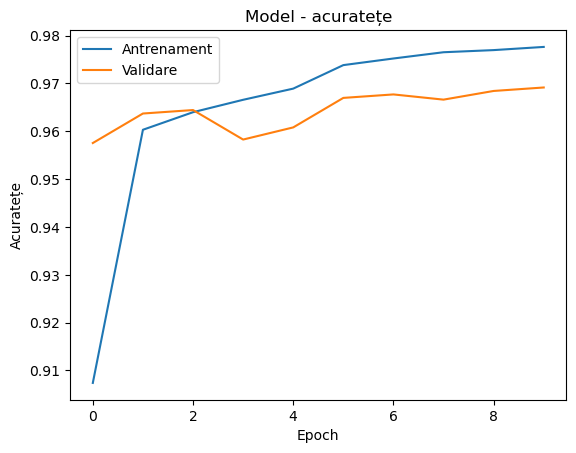

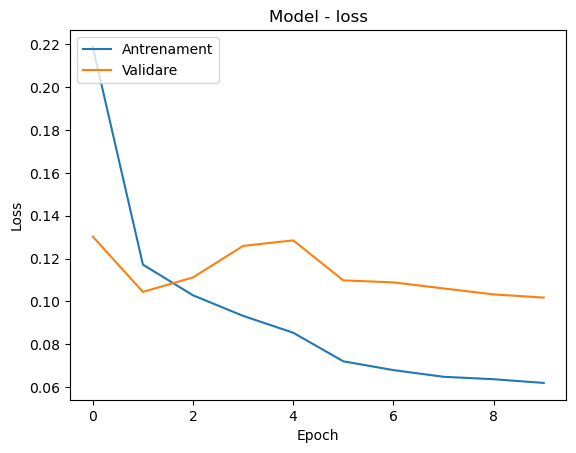

2025.4090449810028
87/87 [==============================] - 1s 15ms/step - loss: 0.1153 - accuracy: 0.9652
[0.11529351770877838, 0.9651669263839722]


In [30]:
import time
start_time = time.time()
callbacks = [reduce_lr]
history = CNN.fit(train_data,
batch_size=16,
epochs=10,
validation_data=val_data,
callbacks=callbacks,
verbose=1)
end_time = time.time()
elapsed_time = end_time - start_time
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model - acuratețe')
plt.xlabel('Epoch')
plt.ylabel('Acuratețe')
plt.legend(['Antrenament', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_acc_cnn_final_with_augg_10.png")
plt.show()
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model - loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Antrenament', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_loss_cnn_final_with_aug_10.png")
plt.show()
print(elapsed_time)
CNN.save('D:\\malarie\\new_models\\of_cnn_final_model_10epochs_with_aug.h5')
print(CNN.evaluate(test_data))

In [11]:
import pandas as pd

model_names = ['CNN fără augmentare', 'CNN cu augmentare']

metrics = ['Acuratețe', 'Clasă', 'F1-score']

model1_values = [0.9640, 'Uninfected', 0.96]
model2_values = ['', 'Parasitized', 0.96]
model3_values = [0.9651, 'Uninfected', 0.96]
model4_values = ['', 'Parasitized', 0.97]

data = {
    'Model': [model_names[0], '', model_names[1], ''],
    metrics[0]: [model1_values[0], model2_values[0], model3_values[0], model4_values[0]],
    metrics[1]: [model1_values[1], model2_values[1], model3_values[1], model4_values[1]],
    metrics[2]: [model1_values[2], model2_values[2], model3_values[2], model4_values[2]]
}

df = pd.DataFrame(data)

df.set_index('Model', inplace=True)

print(df)


                    Acuratețe        Clasă  F1-score
Model                                               
CNN fără augmentare     0.964   Uninfected      0.96
                               Parasitized      0.96
CNN cu augmentare      0.9651   Uninfected      0.96
                               Parasitized      0.97


In [31]:
from sklearn.metrics import classification_report
y_pred = CNN.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
# print classification report
target_names = ['Neinfectat', 'Parazitat']  
print(classification_report(y_test, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

  Neinfectat       0.95      0.98      0.96      1351
   Parazitat       0.98      0.95      0.97      1405

    accuracy                           0.97      2756
   macro avg       0.97      0.97      0.97      2756
weighted avg       0.97      0.97      0.97      2756



In [25]:
# Load the saved model
CNN = tf.keras.models.load_model('D:\\malarie\\new_models\\of_cnn_final_model_10epochs_with_aug.h5')

[[1320   65]
 [  31 1340]]


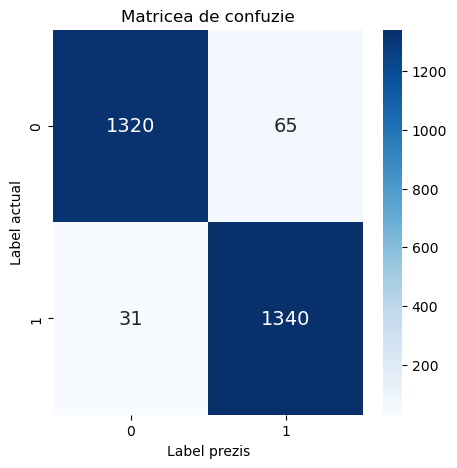

In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = CNN.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_pred_classes.flatten(), y_test)
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, annot_kws={'fontsize':14}, fmt='d')
plt.title('Matricea de confuzie')
plt.xlabel('Label prezis')
plt.ylabel('Label actual')
plt.savefig('D:\\malarie\\new_matrix\\of_confusion_matrix_cnn_10_ep_with_aug_new.png')
plt.show()

In [29]:
def create_CNN():
    model=Sequential()
    model.add(Conv2D(32, (3,3), activation = 'relu', padding='same', input_shape = (128, 128, 3), kernel_initializer='he_normal'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(256, (3,3), activation = 'relu', padding='same'))
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
        
    model.add(Dense(512, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    
 
    model.add(Dense(1, activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.00001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [30]:
CNN=create_CNN()
CNN.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 256)       147712    
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 65536)           

Epoch 1/20
689/689 [==============================] - 109s 135ms/step - loss: 0.6272 - accuracy: 0.6479 - val_loss: 0.5724 - val_accuracy: 0.7097
Epoch 2/20
689/689 [==============================] - 39s 56ms/step - loss: 0.5620 - accuracy: 0.7145 - val_loss: 0.5229 - val_accuracy: 0.7591
Epoch 3/20
689/689 [==============================] - 37s 54ms/step - loss: 0.5197 - accuracy: 0.7522 - val_loss: 0.4800 - val_accuracy: 0.7870
Epoch 4/20
689/689 [==============================] - 37s 54ms/step - loss: 0.4750 - accuracy: 0.7798 - val_loss: 0.4356 - val_accuracy: 0.8139
Epoch 5/20
689/689 [==============================] - 37s 54ms/step - loss: 0.4276 - accuracy: 0.8107 - val_loss: 0.3977 - val_accuracy: 0.8117
Epoch 6/20
689/689 [==============================] - 37s 54ms/step - loss: 0.3748 - accuracy: 0.8397 - val_loss: 0.3366 - val_accuracy: 0.8770
Epoch 7/20
689/689 [==============================] - 37s 53ms/step - loss: 0.3243 - accuracy: 0.8730 - val_loss: 0.3146 - val_accurac

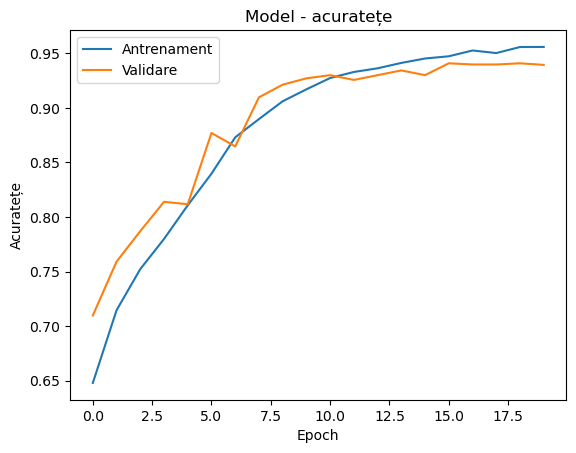

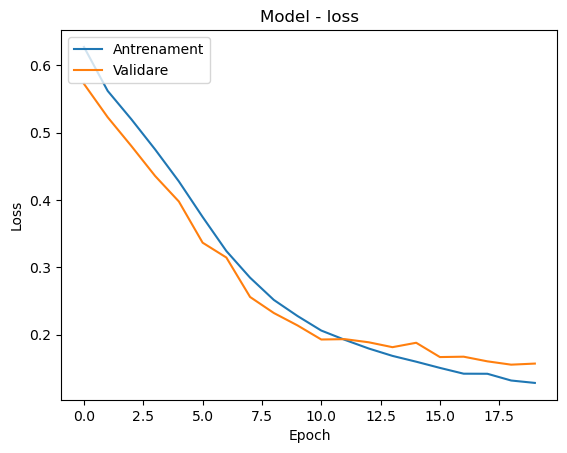

822.5571820735931


In [25]:
import time
start_time = time.time()
callbacks = [reduce_lr]
history = CNN.fit(train_data,
batch_size=BATCH_SIZE,
epochs=EPOCHS,
validation_data=val_data,
callbacks=callbacks,
verbose=1)
end_time = time.time()
elapsed_time = end_time - start_time
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model - acuratețe')
plt.xlabel('Epoch')
plt.ylabel('Acuratețe')
plt.legend(['Antrenament', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_acc_cnn_without_augg.png")
plt.show()
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model - loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Antrenament', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_loss_cnn_without_aug.png")
plt.show()
print(elapsed_time)
CNN.save('D:\\malarie\\new_models\\of_cnn_model_20epochs_without_aug.h5')

In [26]:
CNN.evaluate(test_data)

87/87 [==============================] - 4s 46ms/step - loss: 0.1771 - accuracy: 0.9398


[0.177128866314888, 0.9397677779197693]

[[1306  121]
 [  45 1284]]


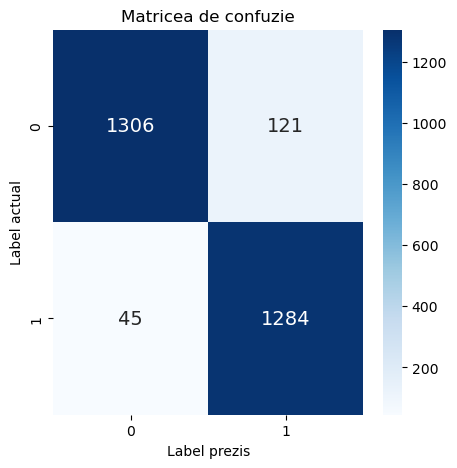

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = CNN.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_pred_classes.flatten(), y_test)
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, annot_kws={'fontsize':14}, fmt='d')
plt.title('Matricea de confuzie')
plt.xlabel('Label prezis')
plt.ylabel('Label actual')
plt.savefig('D:\\malarie\\new_matrix\\of_confusion_matrix_cnn_20_ep_without_aug.png')
plt.show()

In [28]:
from sklearn.metrics import classification_report
y_pred = CNN.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
# print classification report
target_names = ['Neinfectat', 'Parazitat']  
print(classification_report(y_test, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

  Neinfectat       0.92      0.97      0.94      1351
   Parazitat       0.97      0.91      0.94      1405

    accuracy                           0.94      2756
   macro avg       0.94      0.94      0.94      2756
weighted avg       0.94      0.94      0.94      2756



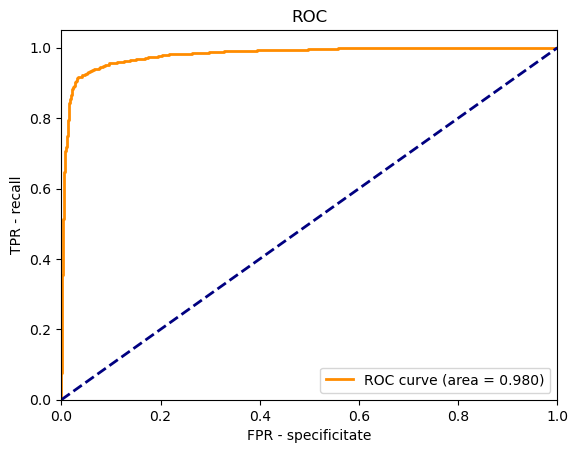

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR - specificitate')
plt.ylabel('TPR - recall')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig("D:\\malarie\\new_graphics\\roc_cnn")
plt.show()

In [26]:
# Load the saved model
CNN = tf.keras.models.load_model('D:\\malarie\\new_models\\of_cnn_model_20epochs_without_aug.h5')

## CNN with augmented data

In [19]:
train_data = create_data_batches(X_train, y_train, augment_data=True)
val_data = create_data_batches(X_val, y_val, test_data=True)
test_data=create_data_batches(X_test, y_test, test_data=True)

Creating training data batches...
Dataset length: 132276
Creating test/validation data batches...
Creating test/validation data batches...


In [20]:
# View string representation of datasets
print('========================================')
print('Train Input Data Pipeline:\n\n', train_data)
print('========================================')
print('Validation Input Data Pipeline:\n\n', val_data)
print('========================================')
print('Test Input Data Pipeline:\n\n', test_data)
print('========================================')

Train Input Data Pipeline:

 <BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>
Validation Input Data Pipeline:

 <BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>
Test Input Data Pipeline:

 <BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>


In [21]:
def create_CNN_v2():
    model=Sequential()
    model.add(Conv2D(32, (3,3), activation = 'relu', padding='same', input_shape = (128, 128, 3), kernel_initializer='he_normal'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(256, (3,3), activation = 'relu', padding='same'))
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
        
    model.add(Dense(512, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    
 
    model.add(Dense(1, activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.00001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [22]:
EPOCHS=20

In [23]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Create a callback to reduce the learning rate when the validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

In [24]:
CNN_v2=create_CNN_v2()
CNN_v2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

Epoch 1/20
4134/4134 [==============================] - 227s 52ms/step - loss: 0.5305 - accuracy: 0.7346 - val_loss: 0.4680 - val_accuracy: 0.7787
Epoch 2/20
4134/4134 [==============================] - 215s 52ms/step - loss: 0.3319 - accuracy: 0.8632 - val_loss: 0.3208 - val_accuracy: 0.8748
Epoch 3/20
4134/4134 [==============================] - 218s 53ms/step - loss: 0.2126 - accuracy: 0.9218 - val_loss: 0.2507 - val_accuracy: 0.9053
Epoch 4/20
4134/4134 [==============================] - 218s 53ms/step - loss: 0.1687 - accuracy: 0.9398 - val_loss: 0.1882 - val_accuracy: 0.9372
Epoch 5/20
4134/4134 [==============================] - 223s 54ms/step - loss: 0.1477 - accuracy: 0.9482 - val_loss: 0.1611 - val_accuracy: 0.9441
Epoch 6/20
4134/4134 [==============================] - 222s 54ms/step - loss: 0.1362 - accuracy: 0.9525 - val_loss: 0.1501 - val_accuracy: 0.9510
Epoch 7/20
4134/4134 [==============================] - 222s 54ms/step - loss: 0.1264 - accuracy: 0.9557 - val_loss: 0

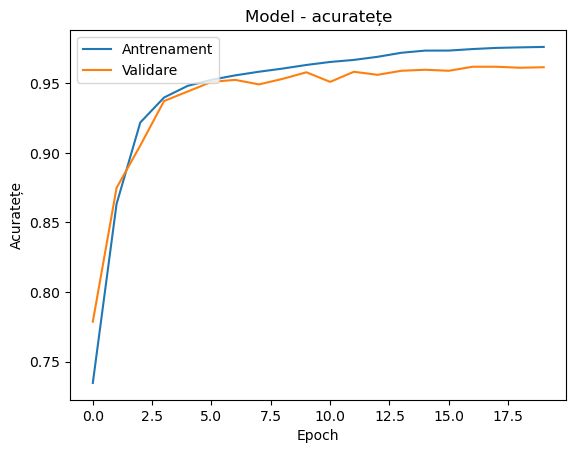

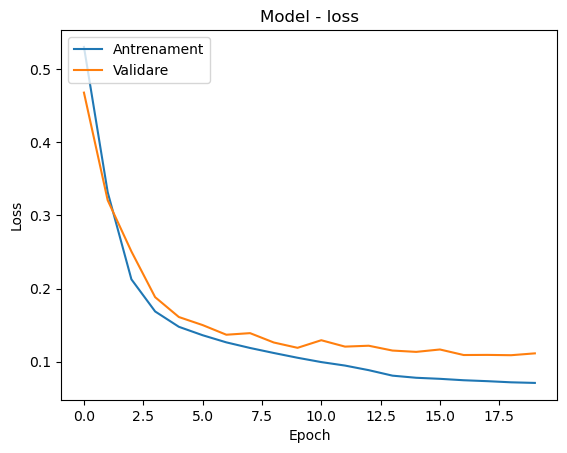

4632.7793841362


NameError: name 'CNN' is not defined

In [25]:
import time
start_time = time.time()
callbacks = [reduce_lr]
history = CNN_v2.fit(train_data,
batch_size=BATCH_SIZE,
epochs=EPOCHS,
validation_data=val_data,
callbacks=callbacks,
verbose=1)
end_time = time.time()
elapsed_time = end_time - start_time
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model - acuratețe')
plt.xlabel('Epoch')
plt.ylabel('Acuratețe')
plt.legend(['Antrenament', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_acc_cnn_with_augg.png")
plt.show()
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model - loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Antrenament', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_loss_cnn_with_aug.png")
plt.show()
print(elapsed_time)


In [27]:
CNN_v2.save('D:\\malarie\\new_models\\of_cnn_model_20epochs_with_aug.h5')

In [26]:
CNN_v2.evaluate(test_data)

87/87 [==============================] - 1s 14ms/step - loss: 0.1387 - accuracy: 0.9485


[0.13865059614181519, 0.9484760761260986]

[[1278   69]
 [  73 1336]]


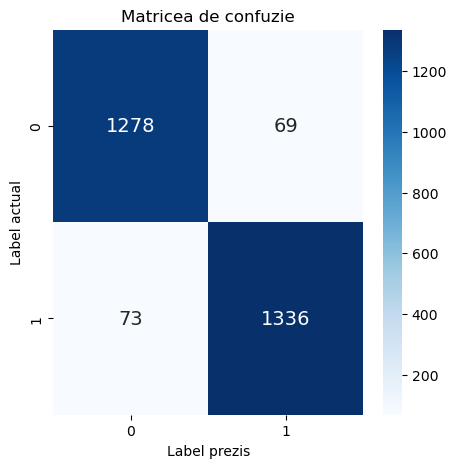

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = CNN_v2.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_pred_classes.flatten(), y_test)
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, annot_kws={'fontsize':14}, fmt='d')
plt.title('Matricea de confuzie')
plt.xlabel('Label prezis')
plt.ylabel('Label actual')
plt.savefig('D:\\malarie\\new_matrix\\of_confusion_matrix_cnn_20_ep_with_aug.png')
plt.show()

In [29]:
from sklearn.metrics import classification_report
y_pred = CNN_v2.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
# print classification report
target_names = ['Neinfectat', 'Parazitat']  
print(classification_report(y_test, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

  Neinfectat       0.95      0.95      0.95      1351
   Parazitat       0.95      0.95      0.95      1405

    accuracy                           0.95      2756
   macro avg       0.95      0.95      0.95      2756
weighted avg       0.95      0.95      0.95      2756



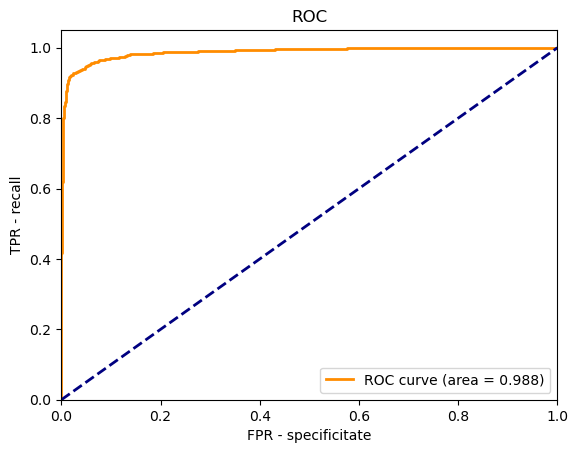

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR - specificitate')
plt.ylabel('TPR - recall')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig("D:\\malarie\\new_graphics\\roc_cnn_with_aug")
plt.show()

In [31]:
# Load the saved model
CNN_v2 = tf.keras.models.load_model('D:\\malarie\\new_models\\of_cnn_model_20epochs_with_aug.h5')

## What does my CNNs see?

In [26]:
import plotly.io as pio
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import mobilenet_v2
from PIL import Image as PilImage

from omnixai.data.image import Image
from omnixai.preprocessing.image import Resize
from omnixai.explainers.vision.specific.gradcam import GradCAM
from omnixai.explainers.vision import VisionExplainer
from omnixai.visualization.dashboard import Dashboard

In [27]:
def preprocess(images):
    data = []
    for i in range(len(images)):
        im = tf.keras.preprocessing.image.img_to_array(images[i].to_pil())
        data.append(np.expand_dims(im, axis=0))
    data = np.concatenate(data, axis=0)
    data = data.astype('float32') / 255.0 # normalize pixel values
    return data

In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image
# Create a function for preprocessing images 
def process_image(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    # Read in an image file
    img = image.load_img(image_path,target_size=(img_height,img_width))
    img_array = image.img_to_array(img)
    img_processed = tf.expand_dims(img_array, axis=0)
    img_processed/=255.
    return img_processed

In [29]:


import numpy as np

# Create a function for preprocessing images 
def process_image(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    # Read in an image file
    image = tf.io.read_file(image_path)
    # Turn the PNG image into numerical Tensor with 3 colour channels (Red, Green, Blue)
    image = tf.image.decode_png(image, channels=3)
    # Convert the colour channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Rescale the pixel values of the image to the range [0, 1]
    image = (image - tf.reduce_min(image)) / (tf.reduce_max(image) - tf.reduce_min(image))
    #Resize image
    image = tf.image.resize(image, [img_height, img_width], method=tf.image.ResizeMethod.BICUBIC)
    return image

In [30]:
# Load images for testing
img_1 = Resize((128,128)).transform(Image(PilImage.open(X_test[0]).convert('RGB')))
img_2 = Resize((128,128)).transform(Image(PilImage.open(X_test[1]).convert('RGB')))
img_3 = Resize((128,128)).transform(Image(PilImage.open(X_test[2]).convert('RGB')))
img_4 = Resize((128,128)).transform(Image(PilImage.open(X_test[3]).convert('RGB')))
img_5 = Resize((128,128)).transform(Image(PilImage.open(X_test[4]).convert('RGB')))
img_6 = Resize((128,128)).transform(Image(PilImage.open(X_test[5]).convert('RGB')))
img_7 = Resize((128,128)).transform(Image(PilImage.open(X_test[6]).convert('RGB')))
img_8 = Resize((128,128)).transform(Image(PilImage.open(X_test[7]).convert('RGB')))
img_9 = Resize((128,128)).transform(Image(PilImage.open(X_test[8]).convert('RGB')))
img_10 = Resize((128,128)).transform(Image(PilImage.open(X_test[9]).convert('RGB')))
img_11 = Resize((128,128)).transform(Image(PilImage.open(X_test[10]).convert('RGB')))
img_12 = Resize((128,128)).transform(Image(PilImage.open(X_test[11]).convert('RGB')))
img_13 = Resize((128,128)).transform(Image(PilImage.open(X_test[12]).convert('RGB')))
img_14 = Resize((128,128)).transform(Image(PilImage.open(X_test[13]).convert('RGB')))
img_15 = Resize((128,128)).transform(Image(PilImage.open(X_test[14]).convert('RGB')))
img_16 = Resize((128,128)).transform(Image(PilImage.open(X_test[15]).convert('RGB')))
img_17 = Resize((128,128)).transform(Image(PilImage.open(X_test[16]).convert('RGB')))
img_18 = Resize((128,128)).transform(Image(PilImage.open(X_test[17]).convert('RGB')))
img_19 = Resize((128,128)).transform(Image(PilImage.open(X_test[18]).convert('RGB')))
img_20 = Resize((128,128)).transform(Image(PilImage.open(X_test[19]).convert('RGB')))
img = Image(
    data=np.concatenate([
        img_1.to_numpy(), img_2.to_numpy(), img_3.to_numpy(), img_4.to_numpy(), img_5.to_numpy(), img_6.to_numpy(), img_7.to_numpy(), img_8.to_numpy(), img_9.to_numpy(), img_10.to_numpy(), img_11.to_numpy(), img_12.to_numpy(), img_13.to_numpy(), img_14.to_numpy(), img_15.to_numpy(), img_16.to_numpy(), img_17.to_numpy(), img_18.to_numpy(), img_19.to_numpy(), img_20.to_numpy()]),
    batched=True
)
print(img.shape)

(20, 128, 128, 3)


In [31]:
#img = Resize((128, 128)).transform(Image(PilImage.open(X_train[0]).convert('RGB')))

In [32]:
input_img = preprocess(img)
predictions = CNN.predict(input_img)
pred_class = np.where(predictions > 0.5, 1, 0)
predictions, 1-predictions

(array([[9.9995685e-01],
        [3.2291302e-04],
        [1.0000000e+00],
        [1.1358313e-04],
        [8.1944403e-05],
        [8.1843900e-05],
        [9.9985754e-01],
        [1.5506101e-02],
        [4.6606027e-02],
        [2.1607651e-04],
        [1.0000000e+00],
        [9.9988413e-01],
        [9.9991822e-01],
        [9.8682249e-01],
        [5.8450783e-04],
        [7.9488824e-04],
        [9.9995124e-01],
        [4.1026203e-04],
        [6.8259219e-06],
        [9.8677689e-01]], dtype=float32),
 array([[4.3153763e-05],
        [9.9967706e-01],
        [0.0000000e+00],
        [9.9988639e-01],
        [9.9991804e-01],
        [9.9991816e-01],
        [1.4245510e-04],
        [9.8449391e-01],
        [9.5339400e-01],
        [9.9978393e-01],
        [0.0000000e+00],
        [1.1587143e-04],
        [8.1777573e-05],
        [1.3177514e-02],
        [9.9941552e-01],
        [9.9920511e-01],
        [4.8756599e-05],
        [9.9958974e-01],
        [9.9999315e-01],
        

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)
    return x


In [34]:
input_img = preprocess_image(X_train[7])
#input_img = tf.expand_dims(input_img, axis=-1)
predictions = CNN.predict(input_img)
pred_class = np.where(predictions > 0.5, 1, 0)
pred_class,y_train[7]

(array([[1]]), 1)

In [35]:
target_layer=CNN.layers[-6]

In [36]:
import tensorflow as tf

def postprocess(predictions):
    stacked = tf.stack([1-predictions, predictions], axis=1)
    return tf.squeeze(stacked)

In [ ]:
from omnixai.explainers.vision import VisionExplainer
from omnixai.visualization.dashboard import Dashboard

explainer = VisionExplainer(
    explainers=["gradcam", "layercam" ,"lime", "ig", "smoothgrad", "shap", "feature_visualization"],
    mode="classification",
    model=CNN,
    preprocess=preprocess,
    postprocess=postprocess,
    params={"gradcam": {"target_layer": target_layer},
            "layercam": {"target_layer": target_layer},
        # Set the objective for feature visualization
        "feature_visualization": 
          {"objectives": [{"layer": target_layer, "type": "channel", "index": list(range(6))}]}
    },
)

# Generate explanations of GradCAM, LIME, IG 
local_explanations = explainer.explain(img)
# Generate explanations of feature visualization
global_explanations = explainer.explain_global()
# Launch the dashboard
dashboard = Dashboard(
    instances=img,
    local_explanations=local_explanations,
    global_explanations=global_explanations,
    class_names=['Neinfectat','Parazitat']
)
dashboard.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\User\miniconda3\envs\licenta\lib\site-packages\shap\explainers\_deep\deep_tf.py:100: UserWarning:

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.

C:\Users\User\miniconda3\envs\licenta\lib\site-packages\keras\backend.py:401: UserWarning:

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.



Step: 300 |████████████████████████████████████████| 100.0% 
Dash is running on http://127.0.0.1:8050/

 * Serving Flask app 'omnixai.visualization.dashboard'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [02/Jun/2023 13:01:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Jun/2023 13:01:52] "GET /assets/base.css?m=1681758205.3098996 HTTP/1.1" 304 -
127.0.0.1 - - [02/Jun/2023 13:01:52] "GET /assets/modal.css?m=1681758205.3174036 HTTP/1.1" 304 -
127.0.0.1 - - [02/Jun/2023 13:01:52] "GET /assets/styles.css?m=1681758205.3174036 HTTP/1.1" 304 -
127.0.0.1 - - [02/Jun/2023 13:01:52] "GET /assets/xai.css?m=1681758205.3174036 HTTP/1.1" 304 -
127.0.0.1 - - [02/Jun/2023 13:01:52] "GET /assets/resizing.js?m=1681758205.3174036 HTTP/1.1" 304 -
127.0.0.1 - - [02/Jun/2023 13:01:52] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [02/Jun/2023 13:01:52] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [02/Jun/2023 13:01:52] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [02/Jun/2023 13:01:52] "GET /assets/logo_small.png HTTP/1.1" 304 -
127.0.0.1 - - [02/Jun/2023 13:01:53] "POST /_dash-update-component HTTP/1.1" 200 -
1